In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1. (4 punkty)

## a) ES(µ + λ) i ES(µ, λ)
Zaimplementuj omawiane na wykładzie strategie ewolucyjne ES(µ + λ) i ES(µ, λ).

Wskazówka: Algorytmy można zaimplementować w dowolnym języku programowania, ale ze względu na
wygodę i wydajność obliczeń (głównie związanych z operacjami wektorowo-macierzowymi i losowaniem
danych z rozkładu normalnego) radziłbym używać środowisk dedykowanych do obliczeń wektorowomacierzowych, m.in. Matlab, Octave lub Python z biblioteką Numpy.

In [89]:
def ES(mu, lambda_, chrom_len, pop_eval, N, min_x, max_x, min_s, max_s, plus=True, K=0.6, tau=None, tau0=None):
    if tau is None:
        tau = K/np.sqrt(2*chrom_len)
    if tau0 is None:
        tau0 = K/(2*np.sqrt(chrom_len))
        
    cost_hist = []
    sigmas_hist = []
    
    xs = np.random.uniform(min_x,max_x,(mu,1,chrom_len))
    ss = np.random.uniform(min_s,max_s,(mu,1,chrom_len))
    P = np.hstack((xs,ss))
    
    scores = pop_eval(P[:,0,:])
    
    def select_parents(P,scores):
        scores_ = scores.copy() / scores.sum()
        Pc_indexes = np.random.choice(
            np.arange(len(scores)),
            size = lambda_,
            replace = True,
            p = scores_,
        )
        return P[Pc_indexes]
    
    def mutate(P):
        epsilon0 = np.random.normal(0, tau0, (lambda_,1))
        epsilon = np.random.normal(0, tau, (lambda_,chrom_len)) + epsilon0
        P[:,1,:] = P[:,1,:] * np.exp(epsilon)
        P[:,0,:] = P[:,0,:] + np.random.normal(0, 1, (lambda_,chrom_len))*P[:,1,:]
        
    def replace(P,scores,Pc,c_scores):
        if plus:
            total_scores = np.hstack((scores,c_scores))
            total_P = np.vstack((P,Pc))
            indxs = np.argsort(total_scores)[:mu]
            return total_P[indxs], total_scores[indxs]
            
        indxs = np.argsort(c_scores)[:mu]
        return Pc[indxs], c_scores[indxs]
            
    for i in range(N):
        Pc = select_parents(P,scores)
        mutate(Pc)
        c_scores = pop_eval(Pc[:,0,:])
        P,scores = replace(P,scores,Pc,c_scores)
        cost_hist.append((scores.min(), scores.mean(), scores.max()))
        sigmas_hist.append(P[:,1,:][scores.argmin()])
    
    return P[:,0,:][scores.argmin()], cost_hist, sigmas_hist

## b) benchmarki
Zapoznaj się z popularnymi benchmarkami dla optymalizacji globalnej (http://wwwoptima.amp.i.kyoto-u.ac.jp/member/student/hedar/Hedar_files/TestGO.htm), zarówno
problemami optymalizacji bez ograniczeń jak i z ograniczeniami. Wybierz 5 benchmarków
bez ograniczeń i użyj zaimplementowanych algorytmów do ich rozwiązywania (wśród
wybranych benchmarków powinna znaleźć się co najmniej jedna z następujących funkcji:
Griewank Function, Rastrigin Function, Schwefel Function). Dokładnie przeanalizuj
działanie algorytmu i otrzymane wyniki. Sprawdź różne ustawienia algorytmu.
Wskazówka: Interesują nas wysokowymiarowe przestrzenie poszukiwań, tzn. funkcja celu powinna mieć
wiele zmiennych. "Wiele” znaczy tutaj od kilkudziesięciu do kilkuset. Dla mniejszych wymiarów problem
często staje się zbyt trywialny i małointeresujący.

In [3]:
def sphere(P):
    return np.sum(P**2,axis=1)

### Sphere function

#### mu + lambda

In [99]:
p,cost_hist,sigmas_hist = ES(mu=200, lambda_=200, chrom_len=50, pop_eval=sphere, N=1000, min_x=-5, max_x=5, min_s=0, max_s=1, plus=True)

Min: 3.191510738640289


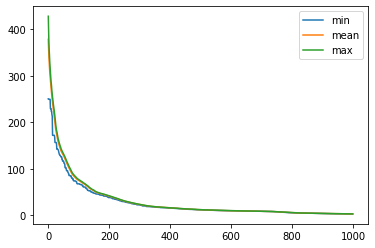

In [102]:
cost_hist = np.array(cost_hist)
print(f'Min: {cost_hist[-1][0]}')
plt.plot(cost_hist[:,0], label='min')
plt.plot(cost_hist[:,1], label='mean')
plt.plot(cost_hist[:,2], label='max')
plt.legend()
plt.show()

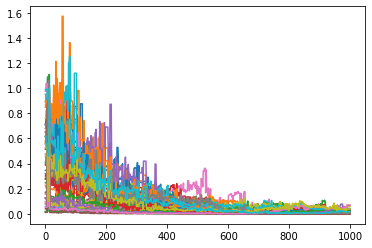

In [101]:
plt.plot(sigmas_hist)
plt.show()

#### mu, lambda

In [135]:
p,cost_hist,sigmas_hist = ES(mu=100, lambda_=200, chrom_len=50, pop_eval=sphere, N=10000, min_x=-5, max_x=5, min_s=0, max_s=1, K=0.1, plus=False)

Min: 2026968016.4424117


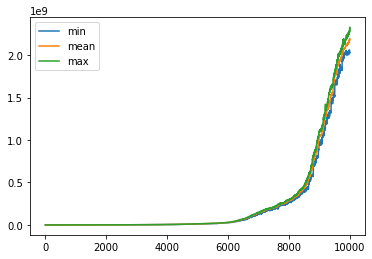

In [136]:
cost_hist = np.array(cost_hist)
print(f'Min: {cost_hist[-1][0]}')
plt.plot(cost_hist[:,0], label='min')
plt.plot(cost_hist[:,1], label='mean')
plt.plot(cost_hist[:,2], label='max')
plt.legend()
plt.show()

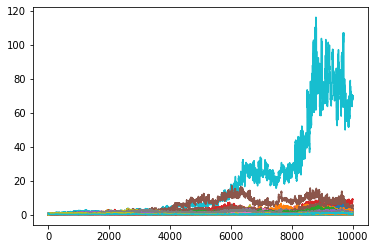

In [137]:
plt.plot(sigmas_hist)
plt.show()

### Griewank function

In [150]:
def griewank(P):
    return (1 + (P**2).sum(axis=1) / 4000 - np.prod(np.cos(P/np.sqrt(np.arange(1, P.shape[-1] + 1))), axis=1))

#### mu + lambda

In [159]:
p,cost_hist,sigmas_hist = ES(mu=100, lambda_=100, chrom_len=50, pop_eval=griewank, N=2000, min_x=-100, max_x=100, min_s=0, max_s=1, K=0.6, plus=True)

Min: 2.4809717054394183


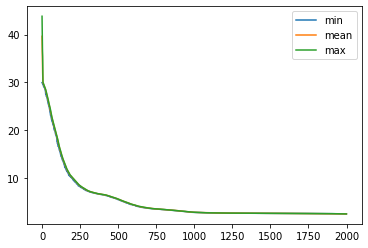

In [160]:
cost_hist = np.array(cost_hist)
print(f'Min: {cost_hist[-1][0]}')
plt.plot(cost_hist[:,0], label='min')
plt.plot(cost_hist[:,1], label='mean')
plt.plot(cost_hist[:,2], label='max')
plt.legend()
plt.show()

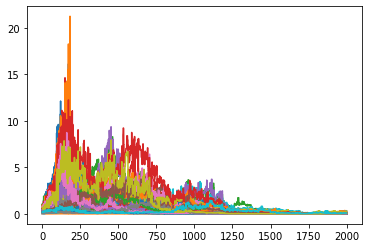

In [161]:
plt.plot(sigmas_hist)
plt.show()

#### mu, lambda

In [156]:
p,cost_hist,sigmas_hist = ES(mu=100, lambda_=200, chrom_len=50, pop_eval=griewank, N=2000, min_x=-100, max_x=100, min_s=0, max_s=1, K=0.1, plus=False)

Min: 165.96296814270107


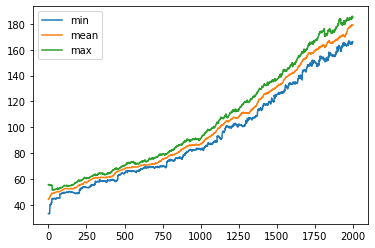

In [157]:
cost_hist = np.array(cost_hist)
print(f'Min: {cost_hist[-1][0]}')
plt.plot(cost_hist[:,0], label='min')
plt.plot(cost_hist[:,1], label='mean')
plt.plot(cost_hist[:,2], label='max')
plt.legend()
plt.show()

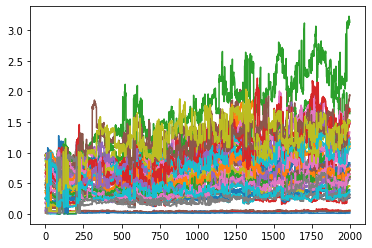

In [158]:
plt.plot(sigmas_hist)
plt.show()

### Schwefel function

In [163]:
def schwefel(P):
    return np.sum(P * np.sin(np.sqrt(np.abs(P))), axis=1) + 418.9829*P.shape[-1]

#### mu + lambda

In [171]:
p,cost_hist,sigmas_hist = ES(mu=200, lambda_=200, chrom_len=50, pop_eval=schwefel, N=5000, min_x=-500, max_x=500, min_s=0, max_s=1, K=0.6, plus=True)

Min: 7720.270629625598


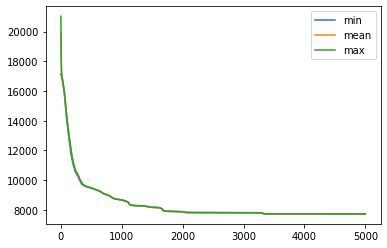

In [172]:
cost_hist = np.array(cost_hist)
print(f'Min: {cost_hist[-1][0]}')
plt.plot(cost_hist[:,0], label='min')
plt.plot(cost_hist[:,1], label='mean')
plt.plot(cost_hist[:,2], label='max')
plt.legend()
plt.show()

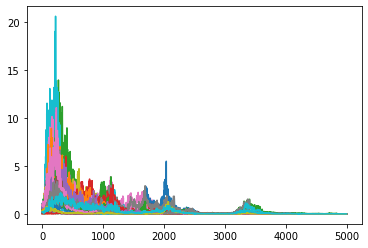

In [173]:
plt.plot(sigmas_hist)
plt.show()

### Rastrigin function

In [168]:
def rastrigin(P):
    return (P**2 - 10 * np.cos(2*np.pi * P)).sum(axis=1) + 10*P.shape[-1]

#### mu + lambda

In [183]:
p,cost_hist,sigmas_hist = ES(mu=200, lambda_=200, chrom_len=50, pop_eval=rastrigin, N=5000, min_x=-5, max_x=5, min_s=0, max_s=1, K=0.6, plus=True)

Min: 186.05958376028065


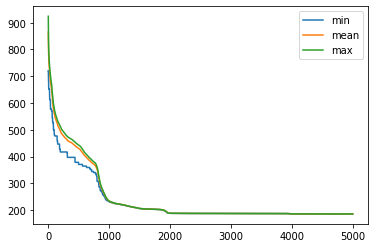

In [184]:
cost_hist = np.array(cost_hist)
print(f'Min: {cost_hist[-1][0]}')
plt.plot(cost_hist[:,0], label='min')
plt.plot(cost_hist[:,1], label='mean')
plt.plot(cost_hist[:,2], label='max')
plt.legend()
plt.show()

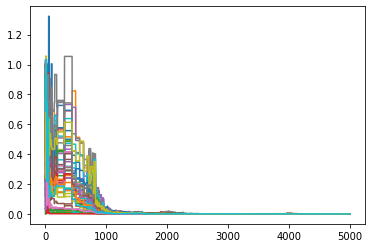

In [185]:
plt.plot(sigmas_hist)
plt.show()

### Dixon & Price function

In [186]:
def dp(P):
    return (P[..., 0]-1)**2 + np.sum((2 * P[..., 1:]**2 - P[..., :-1]**2)**2 * np.arange(2, P.shape[-1] + 1), axis=1)

#### mu + lambda

In [187]:
p,cost_hist,sigmas_hist = ES(mu=200, lambda_=200, chrom_len=50, pop_eval=dp, N=5000, min_x=-10, max_x=10, min_s=0, max_s=1, K=0.6, plus=True)

Min: 0.8470789575553545


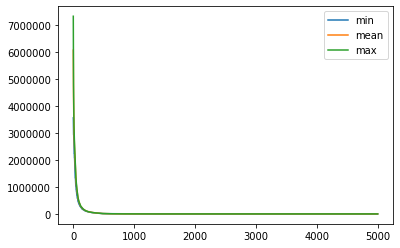

In [188]:
cost_hist = np.array(cost_hist)
print(f'Min: {cost_hist[-1][0]}')
plt.plot(cost_hist[:,0], label='min')
plt.plot(cost_hist[:,1], label='mean')
plt.plot(cost_hist[:,2], label='max')
plt.legend()
plt.show()

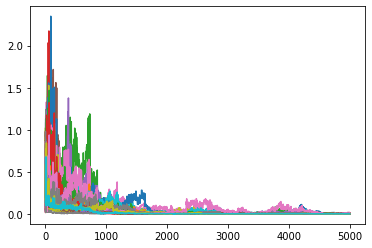

In [189]:
plt.plot(sigmas_hist)
plt.show()

## Zadanie 2. (2 punkty)
Przystosuj zaimplementowane algorytmy do rozwiązywania problemów optymalizacji z
ograniczeniami (według własnych pomysłów). Wybierz 5 benchmarków z ograniczeniami i
użyj zaimplementowanych algorytmów do ich rozwiązywania. Dokładnie przeanalizuj
działanie algorytmu i otrzymane wyniki. Sprawdź różne ustawienia algorytmu.

## Zadanie 3. (2 punkty)
Zmodyfikuj wybrane w zadaniu 1 benchmarki w następujący sposób:
- Wybierz liczby naturalne d i h, takie że d < h.
- Wybierz (lub wygeneruj losowo) macierz A rozmiaru d x h.
- Wybierz (lub wygeneruj losowo) wektor b rozmiaru d.
- Dla każdego y ∈ Rh określ funkcję G(y) = F(A y + b), gdzie F : Rd → R to oryginalna funkcja celu z zadania 1.
- Otrzymana funkcja G : Rh → R jest funkcją h zmiennych. Jakie ma własności?

Użyj strategii ewolucyjnych do rozwiązywania zmodyfikowanych benchmarków z funkcją celu G : Rh → R określoną na przestrzeni poszukiwań Rh. Dokładnie przeanalizuj działanie algorytmu i otrzymane wyniki. Sprawdź różne ustawienia algorytmu.

Wskazówka: Przy modyfikowaniu benchmarków wybierz h dużo większe niż d, na przykład h = 10d. Porównaj skuteczność rozwiązywania benchmarków G i benchmarków F o takim samym wymiarze przestrzeni poszukiwań oraz benchmarków G o wymiarze h i benchmarków F o wymiarze d. Postaraj się przystosować zaimplementowane algorytmy do bardziej efektywnego rozwiązywania zmodyfikowanych benchmarków (według własnych pomysłów)